In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import glob
import numpy as np 

In [2]:
geo_df = gpd.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")
geo_df.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908..."
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774..."
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028..."
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ..."
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ..."


In [3]:
#plt.grid()
#geo_df.plot()

In [4]:
data_path = os.getcwd()+ '/Data/Temp/2020/'
db_data_path = data_path 
os.listdir()
print(os.listdir(db_data_path))

['202001010000TMed.csv', '202002010000TMed.csv', '202003010000TMed.csv', '202004010000TMed.csv', '202005010000TMed.csv', '202006010000TMed.csv', '202007010000TMed.csv', '202008010000TMed.csv', '202009010000TMed.csv', '202010010000TMed.csv', '202011010000TMed.csv', '202012010000TMed.csv']


In [5]:
path = os.getcwd()+ '/Data/Temp/2020/'
all_files = glob.glob(path+'*.csv')
all_files

['C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2020\\202001010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2020\\202002010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2020\\202003010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2020\\202004010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2020\\202005010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2020\\202006010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2020\\202007010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2020\\202008010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2020\\202009010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2020\\202010010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2020\\202011010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Es

In [7]:
#dfPrueba=[df1,df2]
li = []
TMed = ['TMed202001','TMed202002','TMed202003','TMed202004','TMed202005','TMed202006','TMed202007','TMed202008','TMed202009',
        'TMed202010','TMed202011','TMed202012' ]

In [8]:
for i in range(len(TMed)):
    df = pd.read_csv(all_files[i], encoding='latin-1')
    df = df.rename(columns={'Tmed':TMed[i]})
    li.append(df)
    
li[0].head()

,Lon,Lat,Clave,Edo,Est,TMed202001
0,-102.37,21.78,NGRAG,AGS,El Niagara Ags.,14.225806
1,-102.79,21.81,MNLAG,AGS,Media Luna Ags.,14.825806
2,-102.71,21.85,CALVILLO,AGS,Calvillo Ags. SMN*,15.572581
3,-102.29,21.85,OBSAG,AGS,Observatorio de Aguascalientes Ags.,15.151667
4,-102.31,21.90,AGSAG,AGS,Aguascalientes Ags.,15.385484


In [9]:
d1=li[0]
d2=li[1]
d3=li[2]
d4=li[3]
d5=li[4]
d6=li[5]
d7=li[6]
d8=li[7]
d9=li[8]
d10=li[9]
d11=li[10]
d12=li[11]
#len(d1),len(d2)

In [12]:
df_outer = pd.merge(d1,d2,
              on=['Clave','Lon','Lat','Est','Edo'], how='outer')

df_outer = pd.merge(df_outer , d3, on=['Clave','Lon','Lat','Est','Edo'], how='outer')

#pd.concat(li,axis=0,ignore_index=True)
df_outer.head()

,Lon,Lat,Clave,Edo,Est,TMed202001,TMed202002,TMed202003
0,-102.37,21.78,NGRAG,AGS,El Niagara Ags.,14.225806,15.775862,19.943548
1,-102.79,21.81,MNLAG,AGS,Media Luna Ags.,14.825806,16.625000,20.800000
2,-102.71,21.85,CALVILLO,AGS,Calvillo Ags. SMN*,15.572581,17.075862,21.445161
3,-102.29,21.85,OBSAG,AGS,Observatorio de Aguascalientes Ags.,15.151667,17.031034,21.456452
4,-102.31,21.90,AGSAG,AGS,Aguascalientes Ags.,15.385484,17.231034,21.709677


In [13]:
from functools import reduce
dfl=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Clave','Lon','Lat','Est','Edo'],
                                            how='outer'), dfl)

df_merged

,Lon,Lat,Clave,Edo,Est,TMed202001,TMed202002,TMed202003,TMed202004,TMed202005,TMed202006,TMed202007,TMed202008,TMed202009,TMed202010,TMed202011,TMed202012
0,-102.37,21.78,NGRAG,AGS,El Niagara Ags.,14.225806,15.775862,19.943548,20.4,20.8,23.4,21.8,21.2,NaN,NaN,NaN,NaN
1,-102.79,21.81,MNLAG,AGS,Media Luna Ags.,14.825806,16.625000,20.800000,20.7,22.4,25.0,23.0,23.2,21.8,20.3,18.3,14.7
2,-102.71,21.85,CALVILLO,AGS,Calvillo Ags. SMN*,15.572581,17.075862,21.445161,21.8,22.9,25.4,23.3,23.0,21.9,20.7,18.5,15.9
3,-102.29,21.85,OBSAG,AGS,Observatorio de Aguascalientes Ags.,15.151667,17.031034,21.456452,22.8,22.9,24.2,23.0,22.3,21.3,20.3,18.1,15.3
4,-102.31,21.90,AGSAG,AGS,Aguascalientes Ags.,15.385484,17.231034,21.709677,23.5,23.5,23.8,23.5,22.5,21.5,20.4,18.4,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,-103.37,20.72,ZPPJL,JAL,Zapopan Jal.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.1,NaN
1751,-110.93,30.67,MGDSO,SON,Magdalena Son.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.8,NaN
1752,-109.54,31.33,APTSO,SON,Agua Prieta Son.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.4,NaN
1753,-103.61,21.22,HITZC,ZAC,Huitzila Zac.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,13.2


In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 0 to 1754
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lon         1755 non-null   float64
 1   Lat         1755 non-null   float64
 2   Clave       1754 non-null   object 
 3   Edo         1754 non-null   object 
 4   Est         1754 non-null   object 
 5   TMed202001  1282 non-null   float64
 6   TMed202002  1284 non-null   float64
 7   TMed202003  1325 non-null   float64
 8   TMed202004  1367 non-null   float64
 9   TMed202005  1373 non-null   float64
 10  TMed202006  1364 non-null   float64
 11  TMed202007  1349 non-null   float64
 12  TMed202008  1345 non-null   float64
 13  TMed202009  1320 non-null   float64
 14  TMed202010  1291 non-null   float64
 15  TMed202011  1279 non-null   float64
 16  TMed202012  1195 non-null   float64
dtypes: float64(14), object(3)
memory usage: 311.3+ KB


In [16]:
cols = ['TMed202001','TMed202002','TMed202003','TMed202004','TMed202005','TMed202006','TMed202007','TMed202008','TMed202009',
        'TMed202010','TMed202011','TMed202012']
df_merged['TMed'] = df_merged[cols].mean(axis=1)
df_merged

,Lon,Lat,Clave,Edo,Est,TMed202001,TMed202002,TMed202003,TMed202004,TMed202005,TMed202006,TMed202007,TMed202008,TMed202009,TMed202010,TMed202011,TMed202012,TMed
0,-102.37,21.78,NGRAG,AGS,El Niagara Ags.,14.225806,15.775862,19.943548,20.4,20.8,23.4,21.8,21.2,NaN,NaN,NaN,NaN,19.693152
1,-102.79,21.81,MNLAG,AGS,Media Luna Ags.,14.825806,16.625000,20.800000,20.7,22.4,25.0,23.0,23.2,21.8,20.3,18.3,14.7,20.137567
2,-102.71,21.85,CALVILLO,AGS,Calvillo Ags. SMN*,15.572581,17.075862,21.445161,21.8,22.9,25.4,23.3,23.0,21.9,20.7,18.5,15.9,20.624467
3,-102.29,21.85,OBSAG,AGS,Observatorio de Aguascalientes Ags.,15.151667,17.031034,21.456452,22.8,22.9,24.2,23.0,22.3,21.3,20.3,18.1,15.3,20.319929
4,-102.31,21.90,AGSAG,AGS,Aguascalientes Ags.,15.385484,17.231034,21.709677,23.5,23.5,23.8,23.5,22.5,21.5,20.4,18.4,15.5,20.577183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,-103.37,20.72,ZPPJL,JAL,Zapopan Jal.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.1,NaN,19.100000
1751,-110.93,30.67,MGDSO,SON,Magdalena Son.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.8,NaN,19.800000
1752,-109.54,31.33,APTSO,SON,Agua Prieta Son.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.4,NaN,15.400000
1753,-103.61,21.22,HITZC,ZAC,Huitzila Zac.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,13.2,14.600000


In [17]:
geo_df1 = gpd.GeoDataFrame(df_merged, geometry=gpd.points_from_xy(df_merged.Lon, df_merged.Lat), crs="EPSG:4326")
geo_df1

,Lon,Lat,Clave,Edo,Est,TMed202001,TMed202002,TMed202003,TMed202004,TMed202005,TMed202006,TMed202007,TMed202008,TMed202009,TMed202010,TMed202011,TMed202012,TMed,geometry
0,-102.37,21.78,NGRAG,AGS,El Niagara Ags.,14.225806,15.775862,19.943548,20.4,20.8,23.4,21.8,21.2,NaN,NaN,NaN,NaN,19.693152,POINT (-102.37000 21.78000)
1,-102.79,21.81,MNLAG,AGS,Media Luna Ags.,14.825806,16.625000,20.800000,20.7,22.4,25.0,23.0,23.2,21.8,20.3,18.3,14.7,20.137567,POINT (-102.79000 21.81000)
2,-102.71,21.85,CALVILLO,AGS,Calvillo Ags. SMN*,15.572581,17.075862,21.445161,21.8,22.9,25.4,23.3,23.0,21.9,20.7,18.5,15.9,20.624467,POINT (-102.71000 21.85000)
3,-102.29,21.85,OBSAG,AGS,Observatorio de Aguascalientes Ags.,15.151667,17.031034,21.456452,22.8,22.9,24.2,23.0,22.3,21.3,20.3,18.1,15.3,20.319929,POINT (-102.29000 21.85000)
4,-102.31,21.90,AGSAG,AGS,Aguascalientes Ags.,15.385484,17.231034,21.709677,23.5,23.5,23.8,23.5,22.5,21.5,20.4,18.4,15.5,20.577183,POINT (-102.31000 21.90000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,-103.37,20.72,ZPPJL,JAL,Zapopan Jal.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.1,NaN,19.100000,POINT (-103.37000 20.72000)
1751,-110.93,30.67,MGDSO,SON,Magdalena Son.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.8,NaN,19.800000,POINT (-110.93000 30.67000)
1752,-109.54,31.33,APTSO,SON,Agua Prieta Son.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.4,NaN,15.400000,POINT (-109.54000 31.33000)
1753,-103.61,21.22,HITZC,ZAC,Huitzila Zac.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,13.2,14.600000,POINT (-103.61000 21.22000)


In [18]:
intersect = gpd.overlay(geo_df1, geo_df, how='intersection')
intersect

,Lon,Lat,Clave,Edo,Est,TMed202001,TMed202002,TMed202003,TMed202004,TMed202005,...,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,-102.37,21.78,NGRAG,AGS,El Niagara Ags.,14.225806,15.775862,19.943548,20.4,20.8,...,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,POINT (-102.37000 21.78000)
1,-102.79,21.81,MNLAG,AGS,Media Luna Ags.,14.825806,16.625000,20.800000,20.7,22.4,...,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,POINT (-102.79000 21.81000)
2,-102.71,21.85,CALVILLO,AGS,Calvillo Ags. SMN*,15.572581,17.075862,21.445161,21.8,22.9,...,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,POINT (-102.71000 21.85000)
3,-102.29,21.85,OBSAG,AGS,Observatorio de Aguascalientes Ags.,15.151667,17.031034,21.456452,22.8,22.9,...,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,POINT (-102.29000 21.85000)
4,-102.31,21.90,AGSAG,AGS,Aguascalientes Ags.,15.385484,17.231034,21.709677,23.5,23.5,...,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,POINT (-102.31000 21.90000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,-102.90,21.71,PMOZC,ZAC,Los Moraleños Zac.,NaN,NaN,NaN,NaN,NaN,...,32,Zacatecas,Zacatecas,31.3,24.32,22.88,52.01,48.17,0.79,POINT (-102.90000 21.71000)
1721,-103.50,22.33,STEZC,ZAC,Independencia Nacional Zac.,NaN,NaN,NaN,NaN,NaN,...,32,Zacatecas,Zacatecas,31.3,24.32,22.88,52.01,48.17,0.79,POINT (-103.50000 22.33000)
1722,-102.57,22.78,LBUZC,ZAC,Observatorio de Zacatecas Zac.,NaN,NaN,NaN,NaN,NaN,...,32,Zacatecas,Zacatecas,31.3,24.32,22.88,52.01,48.17,0.79,POINT (-102.57000 22.78000)
1723,-103.64,23.64,SOMZC,ZAC,Observatorio de Sombrerete Zac.,NaN,NaN,NaN,NaN,NaN,...,32,Zacatecas,Zacatecas,31.3,24.32,22.88,52.01,48.17,0.79,POINT (-103.64000 23.64000)


In [19]:
grouped = intersect.groupby(['id','state'])['TMed'].agg('mean')
grouped.head()

id  state              
1   Aguascalientes         17.446371
2   Baja California        19.761506
3   Baja California Sur    22.696707
4   Campeche               27.682993
5   Chiapas                25.309496
Name: TMed, dtype: float64

In [27]:
merge = pd.merge(geo_df, grouped, on="id")
merge = merge.rename(columns={'TMed': 'TMed20'})
merge.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,TMed20
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",17.446371
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",19.761506
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",22.696707
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",27.682993
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",25.309496


In [24]:
merge['TMed20'].max()

27.88974362036364

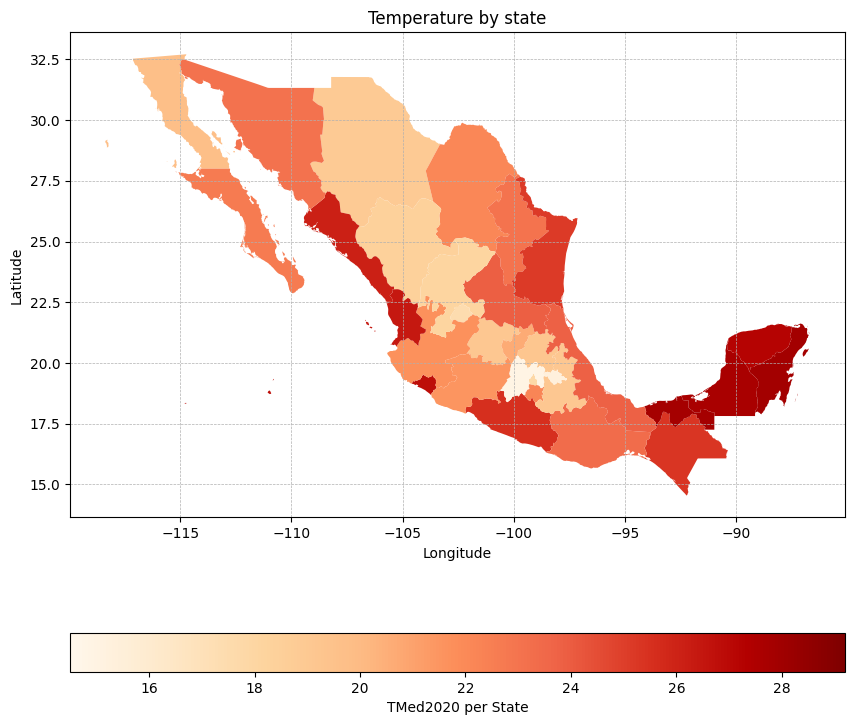

In [26]:
import matplotlib.pyplot as plt

merge.plot(column='TMed20', figsize=(10,10),
           legend_kwds={'label': "TMed2020 per State", 'orientation': "horizontal"}, legend=True, cmap='OrRd',vmin=14.5, vmax=29.2)

plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Temperature by state")
plt.savefig("TMed2020")


# Analisis por mes

Agrupar la tabla merge con los meses e identificador por estado

In [28]:
grouped2 = intersect.groupby(['id','state'])[cols].agg('mean')
grouped2.head()

,,TMed202001,TMed202002,TMed202003,TMed202004,TMed202005,TMed202006,TMed202007,TMed202008,TMed202009,TMed202010,TMed202011,TMed202012
id,state,,,,,,,,,,,,
1,Aguascalientes,13.166975,15.146706,19.168167,20.477273,20.713636,22.022727,20.822727,20.008696,18.737500,17.541667,15.791667,13.504348
2,Baja California,13.580186,14.116349,14.044059,18.081481,22.820000,24.432000,27.065385,28.875000,26.168000,22.648000,16.188000,13.365385
3,Baja California Sur,17.695328,18.295554,19.718893,21.707692,23.842308,26.688462,28.611538,29.507692,29.300000,27.030000,22.548000,18.124000
4,Campeche,24.546257,25.918380,27.956026,31.160000,30.170000,28.900000,29.326316,29.016667,28.862500,27.547059,26.311765,23.835294
5,Chiapas,24.311153,25.093459,25.371191,27.701351,27.207895,25.647297,26.008108,25.878082,25.561972,24.946479,24.578462,22.050000


In [29]:
dfAñoMes2020 = pd.merge(merge, grouped2, on="id")
dfAñoMes2020

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,...,TMed202003,TMed202004,TMed202005,TMed202006,TMed202007,TMed202008,TMed202009,TMed202010,TMed202011,TMed202012
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",...,19.168167,20.477273,20.713636,22.022727,20.822727,20.008696,18.737500,17.541667,15.791667,13.504348
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",...,14.044059,18.081481,22.820000,24.432000,27.065385,28.875000,26.168000,22.648000,16.188000,13.365385
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",...,19.718893,21.707692,23.842308,26.688462,28.611538,29.507692,29.300000,27.030000,22.548000,18.124000
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",...,27.956026,31.160000,30.170000,28.900000,29.326316,29.016667,28.862500,27.547059,26.311765,23.835294
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",...,25.371191,27.701351,27.207895,25.647297,26.008108,25.878082,25.561972,24.946479,24.578462,22.050000
5,6,Chihuahua,Chihuahua,15.2,10.22,34.16,53.92,85.10,1.70,"MULTIPOLYGON (((-108.13750 31.77754, -108.1116...",...,16.711711,19.681356,24.031579,26.676364,26.315789,26.743636,22.815094,20.343860,16.557143,9.978571
6,7,Coahuila,Coahuila de Zaragoza,5.7,6.24,35.01,57.73,106.05,1.02,"MULTIPOLYGON (((-102.27618 29.86955, -102.2582...",...,21.979041,23.947222,26.855556,27.961111,29.188571,28.700000,24.203030,22.639394,19.403226,13.303333
7,8,Colima,Colima,21.0,13.36,18.30,67.89,76.49,0.45,"MULTIPOLYGON (((-114.73404 18.32925, -114.7405...",...,26.625141,25.923529,26.283333,28.276471,28.888235,28.282353,28.131250,28.637500,27.762500,25.473333
8,9,Distrito Federal,Distrito Federal,4.8,0.68,16.48,80.72,172.88,2.12,"MULTIPOLYGON (((-98.96395 19.08912, -98.97687 ...",...,18.990049,20.633333,19.646154,19.715385,19.566667,18.900000,18.425000,16.836364,15.933333,15.358333
9,10,Durango,Durango,17.4,16.62,25.77,56.25,67.61,1.36,"MULTIPOLYGON (((-105.75610 26.69129, -105.7295...",...,18.344487,20.117241,22.033333,23.764516,23.060000,23.021311,20.366667,18.489831,16.168421,11.531373


In [30]:
dfAñoMes2020.to_csv('TempMexAñoMes2020.csv',index=False)